# Import Modules

In [1]:
import white_shark as ws
import numpy as np
import pandas as pd

import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
%matplotlib inline


import geopandas as gpd

## Pathnames and Global Variables

In [2]:
# Path to data file 
POSITION_FILENAME = 'data/subset-calc-pos.csv'
# POSITION_FILENAME = 'data/ALL-CALC-POSITIONS.csv'

# Path to shark metadata 
TAGS_FILENAME = 'data/shark-acoustic-tags.csv'

# Parameter to show delta_t figures
SHOW_FIGS = False

# Import Data

In [3]:
# Call make_df from the main white_shark (ws) file
shark_df = ws.make_df(POSITION_FILENAME)

# print(shark_df.head())
tag_ids = ws.shark_meta(TAGS_FILENAME)

# Get metadata from unique shark IDs
uniq_ids = ws.match_shark_id(shark_df.TRANSMITTER, tag_ids)

# Create Shark objects of all unique sharks in dataset
shark_objs = ws.populate_sharks(shark_df, uniq_ids)

# Data Analysis 

### Operations for every shark in dataset 

#### Within the for-loop we compute:
    1. delta T: time between consecutive observations
    2. step length: distance between consecutive observations
    3. turn angle: angle between consecutive position observations
    4. speed: needs delta T and step length 

In [4]:
# Empty DataFrame for accumulating output data
output_df = pd.DataFrame()
frames = []

for fish in shark_objs:
    """ each fish object contains shark identifiers and its data (DataFrame)
    """

    # Compute delta_t, add to fish.data DataFrame as a new column
    fish.data["delta_t"] = ws.time_between_obs(fish)

    # Calculate step length, add to fish.data DataFrame as a new column
    fish.data["step_length"] = ws.calc_step_length(fish)

    # Calculate turning angle, add to fish.data DataFrame as a new column
    fish.data["turn_angle"] = ws.calc_turn_angle(fish)

    # Calculate speed, add to fish.data DataFrame as a new column
    fish.data["speed"] = ws.calc_speed(fish)

    # Append current shark's output DataFrame to frames List
    frames.append(fish.data[["DATETIME", "delta_t", "step_length", "turn_angle", "speed"]])

# Concatenate all DataFrames in frames
df_out = pd.concat(frames)

# Set column names as headers
df_out.columns = ["DATETIME", "delta_t", "step_length", "turn_angle", "speed"]

if "ALL" in POSITION_FILENAME:
    cutoff = 720
else:
    cutoff = 60

# Accessing Data

---
Use the `loc` keyword to access an individual's data

`df_out.loc['2020-20']`

Note that time is still an index available on the subset above. 

---

In [5]:
# Get all data for shark 20
# df_out.loc['2020-20']
df_out.head()

,DATETIME,delta_t,step_length,turn_angle,speed
sharkID,,,,,
2020-19,2020-05-21 22:07:00,NaN,NaN,NaN,NaN
2020-19,2020-05-21 22:09:00,2.0,115.597253,0.479703,0.963310
2020-19,2020-05-21 22:11:00,2.0,65.079205,0.637416,0.542327
2020-19,2020-05-21 22:14:00,3.0,121.383111,0.555368,0.674351
2020-19,2020-05-21 22:23:00,9.0,344.363465,-0.324055,0.637710


# Plotting

No handles with labels found to put in legend.


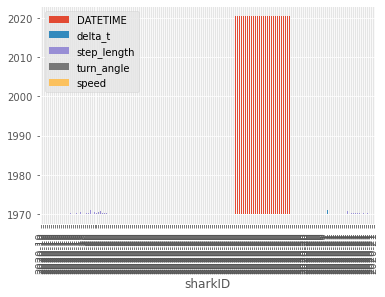

<Figure size 432x288 with 0 Axes>

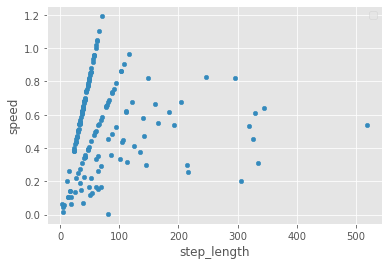

In [6]:
# Scatter plot of some data
df_out.plot.bar()

# Try to plot something
plt.figure()
df_out.plot.scatter(x="step_length", y="speed")
plt.legend(loc='best')
plt.show()

# Plot delta_df results
# ws.plot_delta_t(df_out.loc['sharkID'].delta_t, cutoff)

# TODO: Fix plotting function for delta_t, currently not plotting by individual



